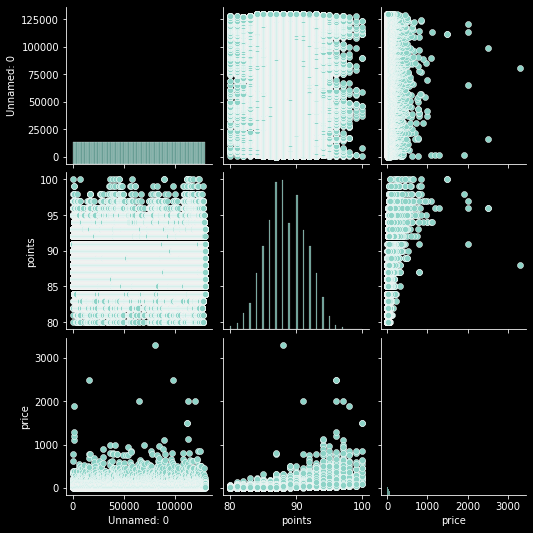

In [122]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/wine_cleared.csv')
sns.pairplot(data=df)

In [123]:
df['price_round'] = df['price'].round().astype(int)

In [124]:
df['year'] = df['title'].str.findall('\d{4}').str.get(0)

In [125]:
display(df.head())

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012


In [126]:
df['country'].value_counts()
df['is_france'] = df['country'].apply(lambda x: True if x == 'France' else False)

In [127]:
df['is_france'].sum()

22093

In [128]:
df['is_italy'] = df['country'].apply(lambda x: True if x == 'Italy' else False)

In [129]:
df['is_italy'].sum()

19540

In [130]:
# преобразуем признак year в объект datetime для удобного сравнения дат
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
df['old_wine'] = df['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
df['old_wine'].sum()

39765

In [131]:
df['locality'] = df['title'].str.findall('(?:\()([a-zA-Z0-9 ]*)(?:\))').str.get(0)
df['locality'].info()
df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 129971 entries, 0 to 129970
Series name: locality
Non-Null Count   Dtype 
--------------   ----- 
106564 non-null  object
dtypes: object(1)
memory usage: 1015.5+ KB


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,False,True,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,False,False,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,False,False,0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,False,False,0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,False,False,0,Willamette Valley


In [132]:
cp = pd.read_csv('data/country_population.csv', sep=';')
cp.head()

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"


In [133]:
cp_italy = cp.loc[(cp['country'] == 'Italy')]
print(cp_italy)

   country  population
24   Italy  59,097,904


In [134]:
df = df.join(cp.set_index('country'), on='country')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

None

In [135]:
ca = pd.read_csv('data/country_area.csv', sep=';')
df = df.merge(ca, on='country')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129835 entries, 0 to 129834
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129835 non-null  int64         
 1   country                129835 non-null  object        
 2   description            129835 non-null  object        
 3   designation            129835 non-null  object        
 4   points                 129835 non-null  int64         
 5   price                  129835 non-null  float64       
 6   province               129835 non-null  object        
 7   region_1               129835 non-null  object        
 8   taster_name            129835 non-null  object        
 9   taster_twitter_handle  129835 non-null  object        
 10  title                  129835 non-null  object        
 11  variety                129834 non-null  object        
 12  winery                 129835 non-null  obje

None

In [136]:
ca_title = df.loc[(df['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))')]
display(ca_title)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_france,is_italy,old_wine,locality,population,area
25271,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Viognier,Gård,22,2014-01-01,False,False,0,WA,"333,022,386",9372610.0


In [137]:
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [138]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [139]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

In [140]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

In [141]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [142]:
calls = calls.drop(columns=['agent_date','created_at','end_date'], axis=1)

In [143]:
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


In [144]:
df['years_diff'] = (pd.to_datetime('2022-01-12') - df['year']).dt.days
df['years_diff'].max()

98627.0

In [145]:
import category_encoders as ce

In [146]:
import pandas as pd

clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [147]:


clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [148]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(df[['year']])
df = pd.concat([df, data_bin], axis=1)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,price_round,year,is_france,is_italy,old_wine,locality,population,area,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,35,2013-01-01,False,True,0,Etna,"59,097,904",301230.0,3298.0,2013-01-01
1,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.000000,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,...,16,2013-01-01,False,True,0,Vittoria,"59,097,904",301230.0,3298.0,2013-01-01
2,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,35,2012-01-01,False,True,0,Etna,"59,097,904",301230.0,3664.0,2012-01-01
3,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,19,2007-01-01,False,True,1,Sicilia,"59,097,904",301230.0,5490.0,2007-01-01
4,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,35,2009-01-01,False,True,1,Sicilia,"59,097,904",301230.0,4759.0,2009-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129830,118031,Macedonia,This Merlot-Cabernet-Vranec blend offers an ap...,Alexandar,86,16.000000,Tikves,unknown,Susan Kostrzewa,@suskostrzewa,...,16,2006-01-01,False,False,1,Tikves,NaN,25333.0,5855.0,2006-01-01
129831,129773,Macedonia,This garnet-colored Pinot Noir is named after ...,Macedon,87,15.000000,Tikves,unknown,Jeff Jenssen,@worldwineguys,...,15,2011-01-01,False,False,0,Tikves,NaN,25333.0,4029.0,2011-01-01
129832,109989,China,This deep ruby-colored wine features a bouquet...,Noble Dragon,89,18.000000,China,unknown,Mike DeSimone,@worldwineguys,...,18,2009-01-01,False,False,1,China,"1,411,778,724",9596960.0,4759.0,2009-01-01
129833,109989,China,This deep ruby-colored wine features a bouquet...,Noble Dragon,89,18.000000,China,unknown,Mike DeSimone,@worldwineguys,...,18,2009-01-01,False,False,1,China,"7,394,700",9596960.0,4759.0,2009-01-01


In [149]:
import category_encoders as ce

clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

ord_encoder = ce.OrdinalEncoder()
type_bin_1 = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing['type'] = clothing['type'].astype('category')
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True)
type_bin_2 = encoder.fit_transform(clothing[['type']])
bin_encoder = ce.BinaryEncoder(cols=['type'])
type_bin_4 = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin_1, type_bin_2, type_bin_4], axis=1)

clothing

,size,type,size,type,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,1,0,0,0,0,0,1
1,xxs,skirt,1,2,0,1,0,0,0,1,0
2,xs,dress,2,1,1,0,0,0,0,0,1
3,s,skirt,3,2,0,1,0,0,0,1,0
4,m,dress,4,1,1,0,0,0,0,0,1
5,l,shirt,5,3,0,0,1,0,0,1,1
6,s,coat,3,4,0,0,0,1,1,0,0
7,m,coat,4,4,0,0,0,1,1,0,0
8,xxl,shirt,6,3,0,0,1,0,0,1,1
9,l,dress,5,1,1,0,0,0,0,0,1


In [150]:
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True)
type_bin_3 = encoder.fit_transform(df[['taster_name']])
df = pd.concat([df, type_bin_3], axis=1)

df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Anna Lee C. Iijima,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,taster_name_Anne Krebiehl MW,taster_name_Mike DeSimone,taster_name_Jeff Jenssen
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.000000,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
2,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
3,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
4,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

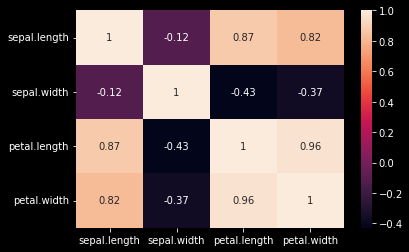

In [151]:
import seaborn as sns # импортируем seaborn для построения графиков

iris = pd.read_csv('data/iris.csv', sep=',')
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

<AxesSubplot:>

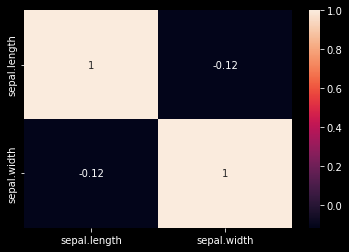

In [152]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)

sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [153]:
df.corr()

,Unnamed: 0,points,price,price_round,is_france,is_italy,old_wine,area,years_diff,taster_name_Kerin O’Keefe,...,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Anna Lee C. Iijima,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,taster_name_Anne Krebiehl MW,taster_name_Mike DeSimone,taster_name_Jeff Jenssen
Unnamed: 0,1.000000,0.006828,0.004616,0.004629,-0.002130,-0.010129,-0.020597,0.011775,-0.016871,-0.001881,...,0.013739,0.005698,0.006123,-0.007521,0.009751,0.002226,-0.001707,0.006661,0.006329,0.005613
points,0.006828,1.000000,0.402116,0.402044,0.059566,0.016196,-0.045786,0.023427,-0.034664,0.041834,...,0.020369,0.010858,-0.001829,-0.055654,-0.022074,-0.007384,-0.001369,0.116501,0.013380,-0.002316
price,0.004616,0.402116,1.000000,0.999997,0.053194,0.039614,0.055753,0.021446,0.052709,0.045912,...,-0.006362,-0.038735,-0.026116,-0.028505,-0.003781,-0.001534,-0.001035,-0.017849,-0.011189,-0.019840
price_round,0.004629,0.402044,0.999997,1.000000,0.052670,0.039362,0.055651,0.021984,0.052625,0.045872,...,-0.006250,-0.038622,-0.026015,-0.028456,-0.003762,-0.001525,-0.001030,-0.017863,-0.011161,-0.019801
is_france,-0.002130,0.059566,0.053194,0.052670,1.000000,-0.190598,-0.083116,-0.398449,-0.066527,-0.136233,...,-0.090305,-0.082560,-0.084960,-0.041473,-0.014824,-0.006531,-0.003078,0.097603,-0.028240,-0.027265
is_italy,-0.010129,0.016196,0.039614,0.039362,-0.190598,1.000000,0.085367,-0.393994,0.081027,0.714765,...,-0.083938,-0.076740,-0.078971,-0.038549,-0.013779,-0.006070,-0.002861,-0.071100,-0.026249,-0.025343
old_wine,-0.020597,-0.045786,0.055753,0.055651,-0.083116,0.085367,1.000000,0.007465,0.502350,-0.123029,...,-0.123354,-0.118392,-0.069066,0.087801,-0.021241,-0.009582,0.002857,-0.108776,-0.034711,-0.026079
area,0.011775,0.023427,0.021446,0.021984,-0.398449,-0.393994,0.007465,1.000000,0.002229,-0.281613,...,0.226786,0.207173,0.040830,-0.038998,0.037200,0.016388,0.007288,-0.159587,-0.058717,-0.059002
years_diff,-0.016871,-0.034664,0.052709,0.052625,-0.066527,0.081027,0.502350,0.002229,1.000000,-0.045673,...,-0.070800,-0.078332,-0.011624,0.055120,-0.020301,-0.006076,0.004774,-0.088126,-0.007812,-0.019255
taster_name_Kerin O’Keefe,-0.001881,0.041834,0.045912,0.045872,-0.136233,0.714765,-0.123029,-0.281613,-0.045673,1.000000,...,-0.059996,-0.054851,-0.056446,-0.027554,-0.009849,-0.004339,-0.002045,-0.050820,-0.018762,-0.018114


In [154]:
display(df.corr(method='pearson'))

,Unnamed: 0,points,price,price_round,is_france,is_italy,old_wine,area,years_diff,taster_name_Kerin O’Keefe,...,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Anna Lee C. Iijima,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,taster_name_Anne Krebiehl MW,taster_name_Mike DeSimone,taster_name_Jeff Jenssen
Unnamed: 0,1.000000,0.006828,0.004616,0.004629,-0.002130,-0.010129,-0.020597,0.011775,-0.016871,-0.001881,...,0.013739,0.005698,0.006123,-0.007521,0.009751,0.002226,-0.001707,0.006661,0.006329,0.005613
points,0.006828,1.000000,0.402116,0.402044,0.059566,0.016196,-0.045786,0.023427,-0.034664,0.041834,...,0.020369,0.010858,-0.001829,-0.055654,-0.022074,-0.007384,-0.001369,0.116501,0.013380,-0.002316
price,0.004616,0.402116,1.000000,0.999997,0.053194,0.039614,0.055753,0.021446,0.052709,0.045912,...,-0.006362,-0.038735,-0.026116,-0.028505,-0.003781,-0.001534,-0.001035,-0.017849,-0.011189,-0.019840
price_round,0.004629,0.402044,0.999997,1.000000,0.052670,0.039362,0.055651,0.021984,0.052625,0.045872,...,-0.006250,-0.038622,-0.026015,-0.028456,-0.003762,-0.001525,-0.001030,-0.017863,-0.011161,-0.019801
is_france,-0.002130,0.059566,0.053194,0.052670,1.000000,-0.190598,-0.083116,-0.398449,-0.066527,-0.136233,...,-0.090305,-0.082560,-0.084960,-0.041473,-0.014824,-0.006531,-0.003078,0.097603,-0.028240,-0.027265
is_italy,-0.010129,0.016196,0.039614,0.039362,-0.190598,1.000000,0.085367,-0.393994,0.081027,0.714765,...,-0.083938,-0.076740,-0.078971,-0.038549,-0.013779,-0.006070,-0.002861,-0.071100,-0.026249,-0.025343
old_wine,-0.020597,-0.045786,0.055753,0.055651,-0.083116,0.085367,1.000000,0.007465,0.502350,-0.123029,...,-0.123354,-0.118392,-0.069066,0.087801,-0.021241,-0.009582,0.002857,-0.108776,-0.034711,-0.026079
area,0.011775,0.023427,0.021446,0.021984,-0.398449,-0.393994,0.007465,1.000000,0.002229,-0.281613,...,0.226786,0.207173,0.040830,-0.038998,0.037200,0.016388,0.007288,-0.159587,-0.058717,-0.059002
years_diff,-0.016871,-0.034664,0.052709,0.052625,-0.066527,0.081027,0.502350,0.002229,1.000000,-0.045673,...,-0.070800,-0.078332,-0.011624,0.055120,-0.020301,-0.006076,0.004774,-0.088126,-0.007812,-0.019255
taster_name_Kerin O’Keefe,-0.001881,0.041834,0.045912,0.045872,-0.136233,0.714765,-0.123029,-0.281613,-0.045673,1.000000,...,-0.059996,-0.054851,-0.056446,-0.027554,-0.009849,-0.004339,-0.002045,-0.050820,-0.018762,-0.018114


In [155]:
hrt = pd.read_csv('data/heart.csv', sep=',')
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [156]:
hrt['old'] = hrt['age'].apply(lambda x: 1 if x > 60 else 0)

In [157]:
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [158]:
hrt['old'].sum()

79

In [159]:
trestbps_norm = [
    [0,'123/76','116/72'],
    [21,'126/79','120/75'],
    [31,'129/81','127/80'],
    [41,'135/83','137/84'],
    [51,'142/85','144/85'],
    [61,'142/80','159/85']
]

trestbps_norm = pd.DataFrame(trestbps_norm)

display(trestbps_norm)

display(trestbps_norm[0][3])

def trestbps_norm_calc(hrt):
    a_g = 5
    while True:
        if hrt['age'] > trestbps_norm[0][a_g]:
            if hrt['sex'] == 0:
                return int(trestbps_norm[2][a_g][0:3])
            elif hrt['sex'] == 1:
                return int(trestbps_norm[1][a_g][0:3])
        else: a_g -= 1

print(hrt.head())
hrt['trestbps_mean'] = hrt.apply(trestbps_norm_calc, axis=1)

display(hrt.info())


,0,1,2
0,0,123/76,116/72
1,21,126/79,120/75
2,31,129/81,127/80
3,41,135/83,137/84
4,51,142/85,144/85
5,61,142/80,159/85


41

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  old  
0   0     1       1    1  
1   0     2       1    0  
2   0     2       1    0  
3   0     2       1    0  
4   0     2       1    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 no

None

In [160]:
encoder = ce.OneHotEncoder(cols=['cp','restecg','slope','ca','thal'], use_cat_names=True)
type_bin_hrt = pd.DataFrame(encoder.fit_transform(hrt[['cp', 'restecg', 'slope', 'ca','thal']]))

hrt = pd.concat([hrt, type_bin_hrt], axis=1)
display(hrt.head())
len(hrt.columns)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0


35

In [161]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_3.0         303 non-null    int64  
 17  cp_2.0         303 non-null    int64  
 18  cp_1.0    

In [162]:
from sklearn import preprocessing as pp

In [163]:
# инициализируем нормализатор RobustScaler
r_scaler = pp.RobustScaler()
list_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# копируем исходный датасет
hrt[list_scaler] = r_scaler.fit_transform(hrt[list_scaler])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации

round(hrt['chol'].std(), 6)

0.816232

<AxesSubplot:>

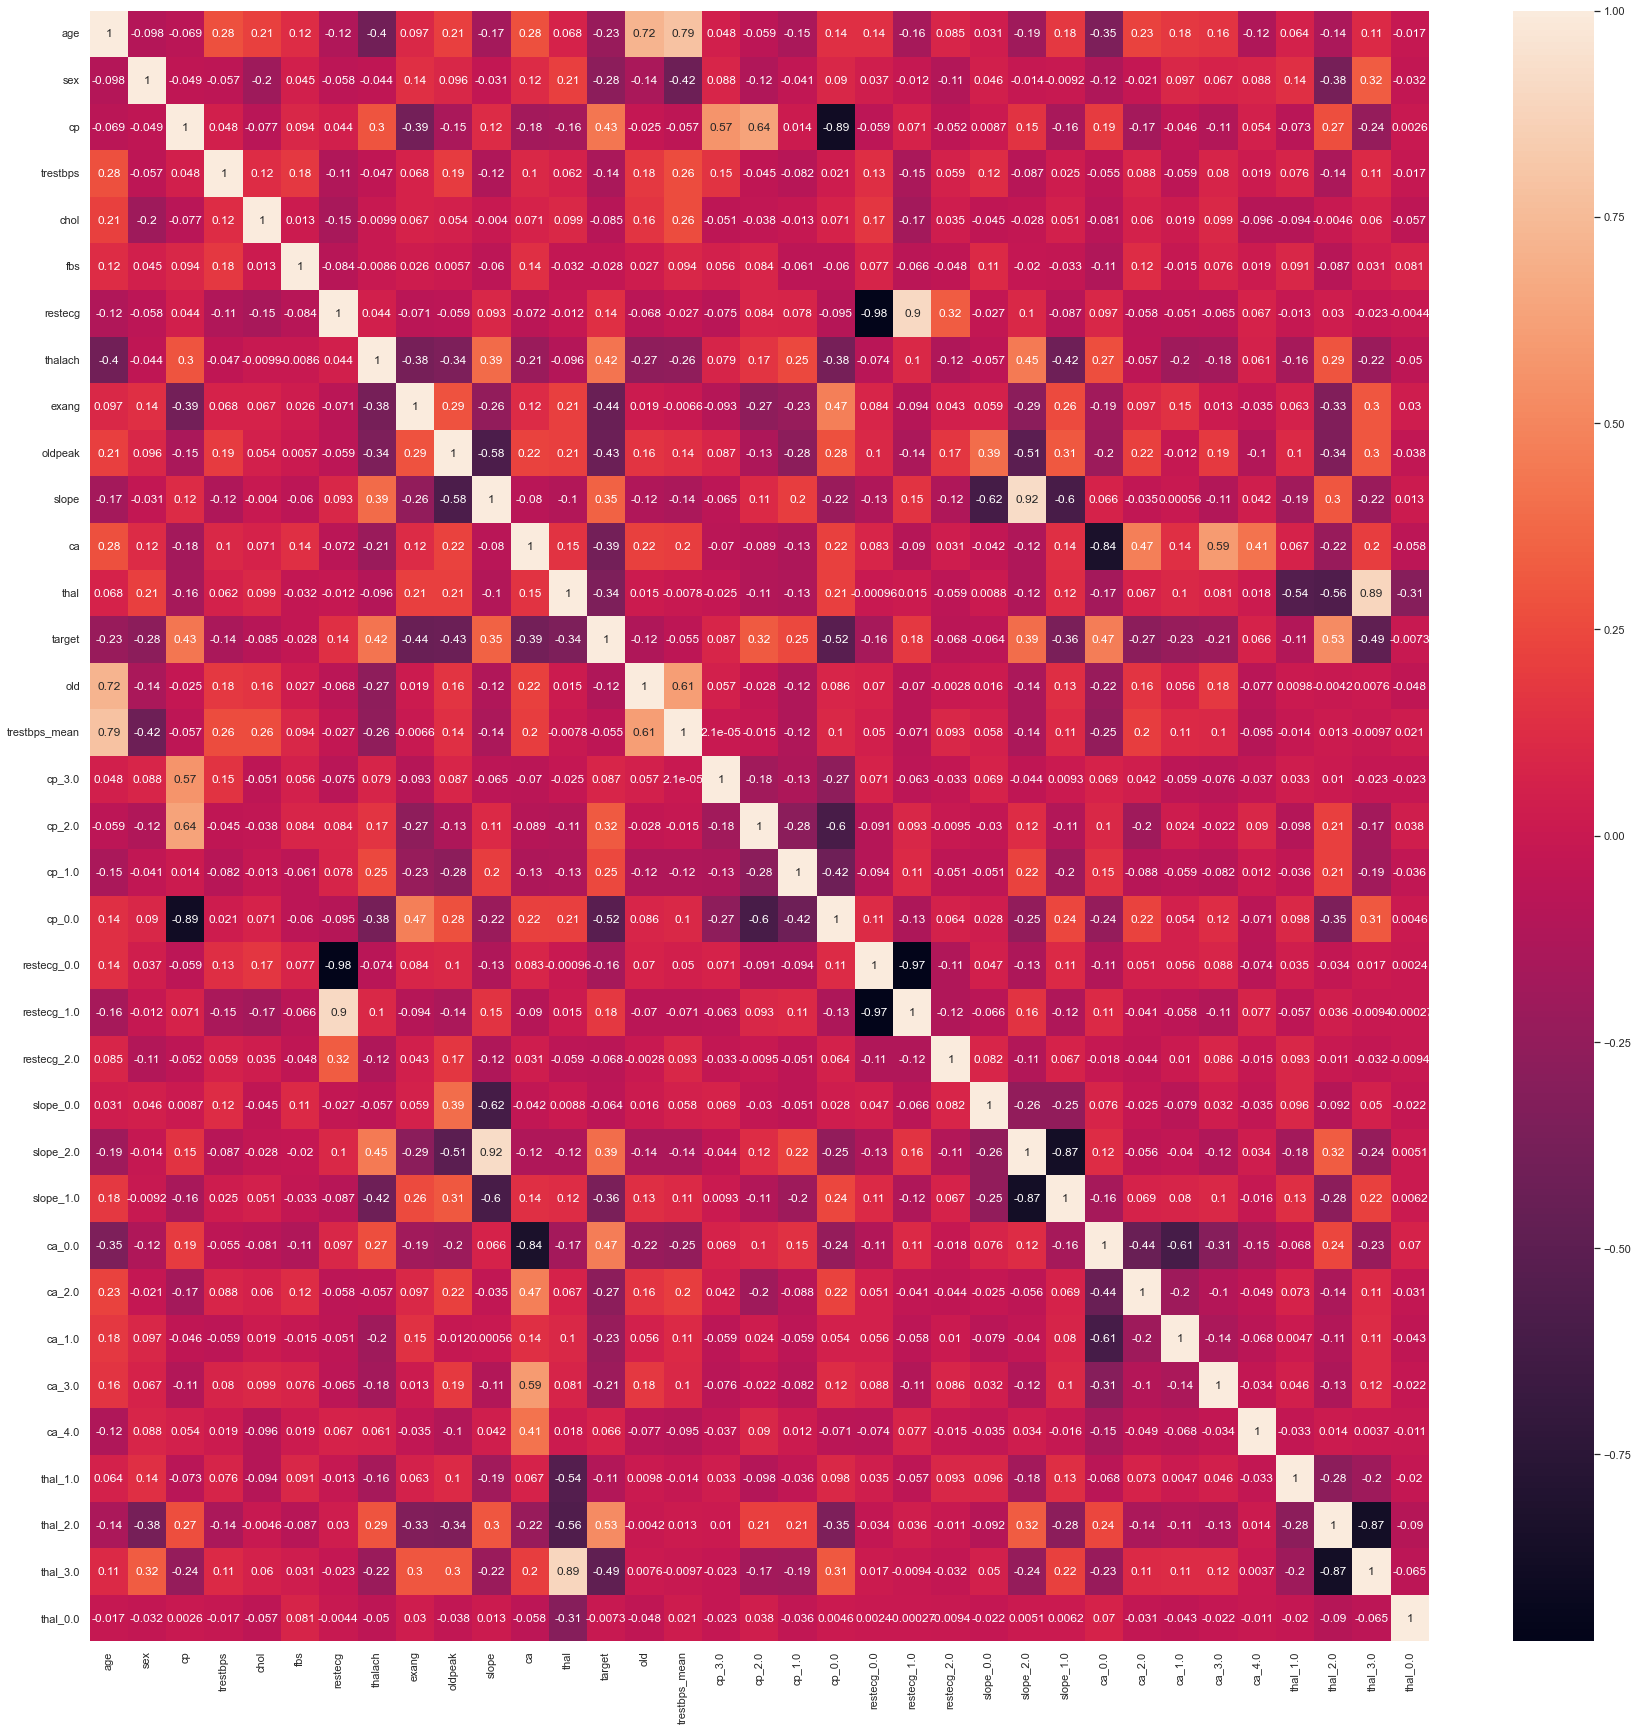

In [167]:
sns.set(rc={"figure.figsize":(30, 30)})
sns.heatmap(hrt.corr(), annot=True)